# Time Series Exploratory Data Analysis 

### This notebook explores the store data and the German Electric Data 

In [102]:
import pandas as pd
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma
import seaborn as sns
import prepare
import warnings
warnings.filterwarnings("ignore")
import acquire
from acquire import get_store_item_demand_data

In [103]:
df = acquire.get_store_item_demand_data()

Reading from CSV file. . .
Reading from csv file. . .
Reading from csv file. . .


In [104]:
df.head()

,Unnamed: 0,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [106]:
df.columns

Index(['Unnamed: 0', 'item_id', 'sale_amount', 'sale_date', 'sale_id',
       'store_id', 'item_brand', 'item_name', 'item_price', 'item_upc12',
       'item_upc14', 'store_address', 'store_city', 'store_state',
       'store_zipcode'],
      dtype='object')

In [107]:
df.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [113]:
df.sale_amount.unique()

array([ 13.,  11.,  14.,  10.,  12.,   9.,   7.,   5.,  16.,  18.,  15.,
         8.,   6.,  21.,  20.,  17.,  22.,  19.,  24.,  23.,  26.,  25.,
        27.,  38.,  34.,  29.,  31.,  30.,   4.,  36.,  28.,  33.,  32.,
        37.,  35.,  43.,  40.,  41.,  39.,  42.,  50.,  45.,  44.,  47.,
        53.,  49.,  46.,  48.,  51.,  58.,  54.,  57.,  55.,  52.,   3.,
         2.,   1.,  59.,  56.,  60.,  63.,  69.,  64.,  67.,  65.,  71.,
        61.,  73.,  62.,  82.,  78.,  68.,  74.,  70.,  87.,  66.,  77.,
        88.,  76.,  75., 102.,  72.,  92.,  86.,  79.,  85.,  81.,  90.,
        84.,  80., 103.,  97.,  96.,  95.,  89., 104.,  94., 100.,  91.,
        83., 106., 101.,  98., 115.,  93., 111., 119.,  99., 108., 110.,
       120., 105., 126., 109., 114., 113., 112., 121., 107., 117., 118.,
       139., 124., 131., 123., 138., 134., 127., 136., 116., 125., 122.,
       128., 150., 129., 135., 137., 132., 133., 145., 130., 144.,   0.,
       148., 141., 140., 152., 147., 169., 156., 15

In [114]:
df.store_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [115]:
df.item_brand.unique()

array(['Riceland', 'Caress', 'Earths Best', 'Boars Head',
       'Back To Nature', 'Sally Hansen', 'Twinings Of London',
       'Lea & Perrins', 'Van De Kamps', 'Ahold', 'Honest Tea', 'Mueller',
       'Garnier Nutritioniste', 'Pamprin', 'Suave', 'Burts Bees', 'Ducal',
       'Scotch', 'Careone', 'Usda Produce', 'Doctors Best',
       'Betty Crocker', 'Reese', 'Smart Living', 'Hood', 'Triaminic',
       'Morton', 'Heinz', 'Petmate', 'Zhenas Gypsy Tea', 'Barefoot',
       'The First Years', 'Halls', 'Natures Way',
       'Deerfields Gluten Free', 'Nakano', 'Sundown Naturals', 'Munchies',
       'Amys', 'P.f. Changs', 'Moms Best Naturals', 'Ferrara', 'Elmers',
       'Kelloggs', 'Mama Marys', 'Bear Naked', 'Dove', 'Easy-off',
       'Choice'], dtype=object)

In [116]:
df.item_name.unique()

array(['Riceland American Jazmine Rice',
       'Caress Velvet Bliss Ultra Silkening Beauty Bar - 6 Ct',
       'Earths Best Organic Fruit Yogurt Smoothie Mixed Berry',
       'Boars Head Sliced White American Cheese - 120 Ct',
       'Back To Nature Gluten Free White Cheddar Rice Thin Crackers',
       'Sally Hansen Nail Color Magnetic 903 Silver Elements',
       'Twinings Of London Classics Lady Grey Tea - 20 Ct',
       'Lea & Perrins Marinade In-a-bag Cracked Peppercorn',
       'Van De Kamps Fillets Beer Battered - 10 Ct',
       'Ahold Cocoa Almonds', 'Honest Tea Peach White Tea',
       'Mueller Sport Care Basic Support Level Medium Elastic Knee Support',
       'Garnier Nutritioniste Moisture Rescue Fresh Cleansing Foam',
       'Pamprin Maximum Strength Multi-symptom Menstrual Pain Relief',
       'Suave Naturals Moisturizing Body Wash Creamy Tropical Coconut',
       'Burts Bees Daily Moisturizing Cream Sensitive',
       'Ducal Refried Red Beans',
       'Scotch Removable C

In [117]:
df.item_price.unique()

array([0.84, 6.44, 2.43, 3.14, 2.61, 6.93, 9.64, 1.68, 1.79, 3.17, 3.93,
       8.4 , 6.47, 7.54, 9.11, 5.17, 1.16, 4.39, 0.74, 5.62, 8.09, 7.31,
       1.78, 5.34, 0.98, 6.01, 7.52, 8.65, 8.39, 4.21, 0.68, 6.52, 4.17,
       5.19, 7.95, 9.59, 3.45, 9.02, 0.6 , 2.97, 7.06, 4.4 , 4.65, 7.38,
       3.72, 9.54, 5.2 ])

In [118]:
df.item_upc12.unique()

array([ 35200264013,  11111065925,  23923330139, 208528800007,
       759283100036,  74170388732,  70177154004,  51600080015,
        19600923015, 688267141676, 657622604842,  74676640211,
       603084234561,  41167300121,  79400847201, 792850014008,
        88313590791,  21200725340,  41520035646, 204040000000,
       753950001954,  16000288829,  70670009658, 688267084225,
        44100117428, 300436344045,  24600017008, 719175900007,
        13000001038, 723503568678, 652790100226,   8500004528,
        71463060078, 312546628694,  33674100066, 610358991525,
        73575295003,  30768540548,  28400029254,  42272008063,
        31000670016, 883978129115,  71403000379,  26000001403,
        38000542237,  35457770664, 884623708976,  79400271631,
        62338879772,  47445919221])

In [119]:
df.item_upc14.unique()

array([ 35200264013,  11111065925,  23923330139, 208528800007,
       759283100036,  74170388732,  70177154004,  51600080015,
        19600923015, 688267141676, 657622604842,  74676640211,
       603084234561,  41167300121,  79400847201, 792850014008,
        88313590791,  21200725340,  41520035646, 204040000000,
       753950001954,  16000288829,  70670009658, 688267084225,
        44100117428, 300436344045,  24600017008, 719175900007,
        13000001038, 723503568678, 652790100226,   8500004528,
        71463060078, 312546628694,  33674100066, 610358991525,
        73575295003,  30768540548,  28400029254,  42272008063,
        31000670016, 883978129115,  71403000379,  26000001403,
        38000542237,  35457770664, 884623708976,  79400271631,
        62338879772,  47445919221])

In [120]:
df.store_address.unique()

array(['12125 Alamo Ranch Pkwy', '9255 FM 471 West',
       '2118 Fredericksburg Rdj', '516 S Flores St', '1520 Austin Hwy',
       '1015 S WW White Rd', '12018 Perrin Beitel Rd',
       '15000 San Pedro Ave', '735 SW Military Dr',
       '8503 NW Military Hwy'], dtype=object)

In [122]:
df.store_city.unique()

array(['San Antonio'], dtype=object)

In [123]:
df.store_state.unique()

array(['TX'], dtype=object)

In [126]:
df.store_zipcode.unique()

array([78253, 78251, 78201, 78204, 78218, 78220, 78217, 78232, 78221,
       78231])

In [4]:
df.sale_date = pd.to_datetime(df.sale_date)

In [5]:
df = df.set_index('sale_date').sort_index()

In [6]:
df = df.rename(columns={'sale_amount': 'quantity'})

In [7]:
df['month'] = df.index.month

df['day_of_week'] = df.index.day_name()
    #create a feature sales total that is the product of quantity and sale price
df['sales_total'] = df.quantity * df.item_price

In [8]:
df.head()

,Unnamed: 0,item_id,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,Tuesday,294.00


# Split the Data 

In [9]:
#look at the range of the index 
#four total years of data 
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2017-12-31 00:00:00+0000', tz='UTC'))

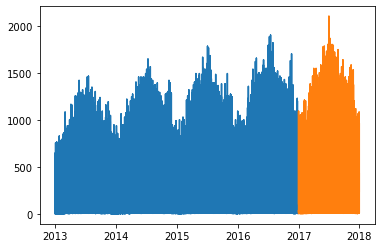

In [12]:
#train test split 
#75% train, 25% test 
#split the data with everything up to 2016 
#test is only 2017 
train = df[:'2016'] 
test = df['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

- Key Takeaway: 
    - 3 years of training data, 1 year of test data 
    - test data is most recent 

<AxesSubplot:xlabel='sale_date'>

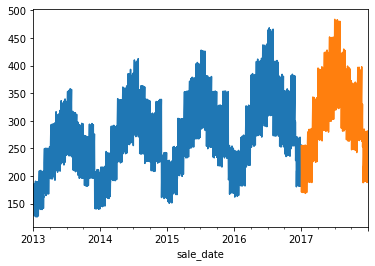

In [13]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

- Key Takeaways: 
    - The business becomes more profitable every year 
    - The business seems to be most profitable mid year (summer)

In [14]:
y = train.sales_total 
y.head()

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
2013-01-01 00:00:00+00:00    125.55
2013-01-01 00:00:00+00:00    453.60
2013-01-01 00:00:00+00:00    294.00
Name: sales_total, dtype: float64

### Visualization Options 

<AxesSubplot:title={'center':'Frequency of Sales Total'}, ylabel='Frequency'>

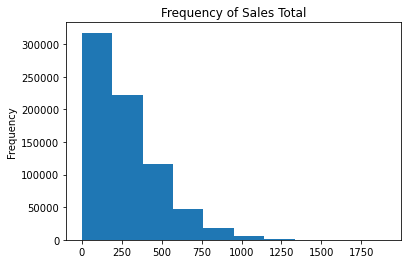

In [15]:
#distributions of target variable 
train.sales_total.plot.hist(title = 'Frequency of Sales Total')

- Key Takeaway: 
    - Right Skewed Data 

<AxesSubplot:xlabel='day_of_week'>

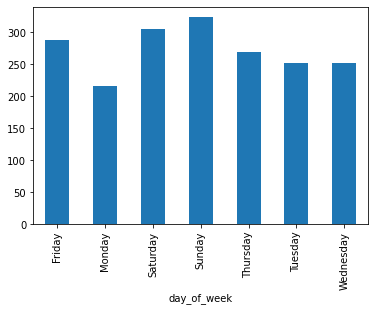

In [17]:
#sales by day of the week 
train.groupby('day_of_week').sales_total.mean().plot.bar()

- Key Takeaway: 
    - Pretty decent averages of sales 
    - higher sales on Fridays, Saturdays, and Sundays 

[Text(0.5, 1.0, 'Average Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Total Sales $')]

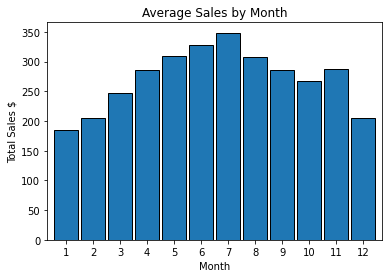

In [18]:
ax = y.groupby(y.index.month).mean().plot.bar(width = 0.9, ec = 'black')
plt.xticks(rotation = 0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Total Sales $')

- Key Takeaway: 
    - More sales in the summer months 
    - The kids are possibly out of school and need to eat at home 
    

In [19]:
train.day_of_week = train.index.strftime('%a')
train.day_of_week = pd.Categorical(train.day_of_week, categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

In [21]:
train.head()

,Unnamed: 0,item_id,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tue,10.92
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tue,218.40
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tue,125.55
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,Tue,453.60
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,Tue,294.00


<AxesSubplot:xlabel='day_of_week', ylabel='sales_total'>

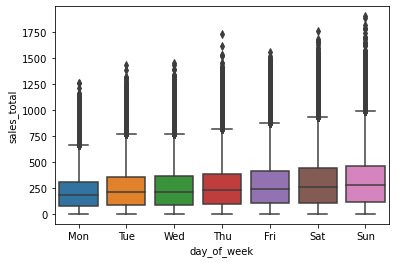

In [22]:
#Sales by day of the week 
sns.boxplot(data = train, y= 'sales_total', x= 'day_of_week')

- Key Takeaways: 
     - More Sales on Friday, Saturday, Sunday
     - More outliers on Thursdays (possibly coupon day?)

# Time Series Visuals 

### Target Over Time 

In [23]:
y = train.sales_total

<AxesSubplot:xlabel='sale_date'>

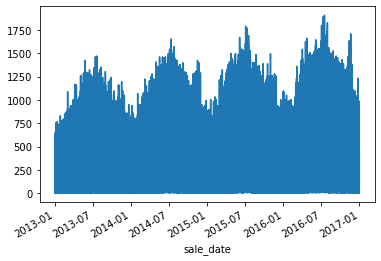

In [24]:
y.plot()

### Target Mean over Periods of Time 

<AxesSubplot:title={'center':'Weekly Average'}, xlabel='sale_date'>

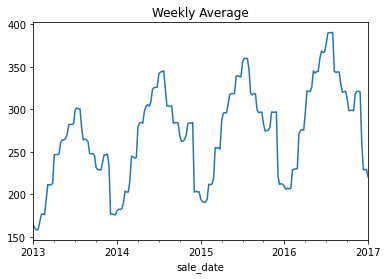

In [25]:
y.resample('W').mean().plot(title = 'Weekly Average')

<AxesSubplot:title={'center':'Monthly Average'}, xlabel='sale_date'>

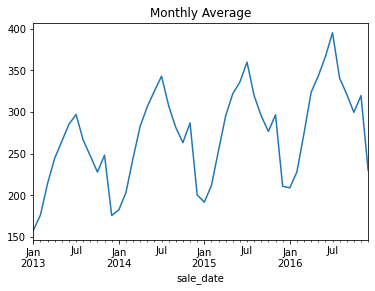

In [26]:
y.resample('M').mean().plot(title = 'Monthly Average')

### Visualize change in Target Over Time 

<AxesSubplot:title={'center':'Weekly Sales Over Time'}, xlabel='sale_date'>

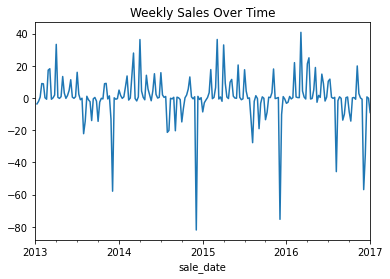

In [27]:
#week to week changes 
y.resample('W').mean().diff().plot(title='Weekly Sales Over Time')

<AxesSubplot:title={'center':'Monthly Sales Over Time'}, xlabel='sale_date'>

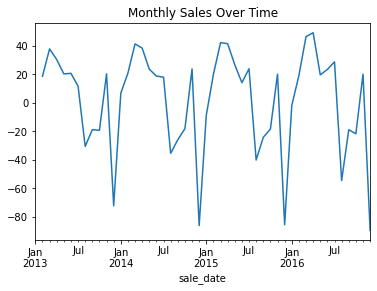

In [28]:
#monthly
y.resample('M').mean().diff().plot(title='Monthly Sales Over Time')

# Seasonal Plot 

Text(0, 0.5, 'Total Sales $')

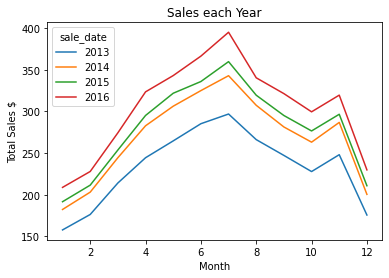

In [30]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Sales each Year')
plt.xlabel('Month')
plt.ylabel('Total Sales $')

### Seasonal Subseries Plots

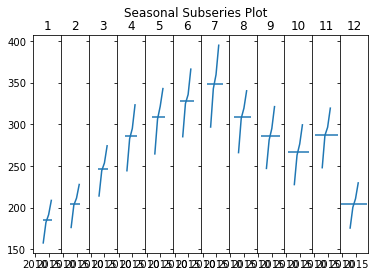

In [32]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

### LAG Plots 

Text(0.5, 1.0, 'Lag plot with lag=1')

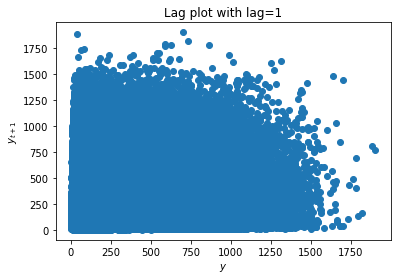

In [34]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

### Autocorrelation Plot 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

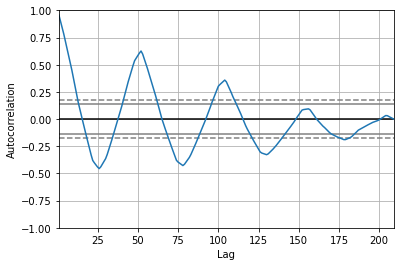

In [41]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())


### Germany Dataset 

In [50]:
df = acquire.german_electric()

Reading from .csv...


In [52]:
df = prepare.prep_german_electric_data(df)

In [55]:
df = df.dropna()

In [56]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,1,2012
2012-01-02,1269.581,207.327,6.574,213.901,1,2012
2012-01-03,1334.745,473.468,24.679,498.147,1,2012
2012-01-04,1347.136,499.804,14.681,514.485,1,2012
2012-01-05,1376.658,523.851,5.071,528.922,1,2012


In [58]:
df.shape

(2187, 6)

### Split the Data 

In [60]:
#look at the range of index 
df.index.min(), df.index.max()
# 6 years of data

(Timestamp('2012-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [61]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,1,2012
2012-01-02,1269.581,207.327,6.574,213.901,1,2012
2012-01-03,1334.745,473.468,24.679,498.147,1,2012
2012-01-04,1347.136,499.804,14.681,514.485,1,2012
2012-01-05,1376.658,523.851,5.071,528.922,1,2012


In [65]:
df.shape

(2187, 6)

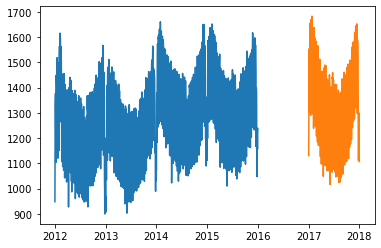

In [70]:
#train test split 
train = df[:'2015'] 
test = df['2016' and '2017']

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

<AxesSubplot:xlabel='Date'>

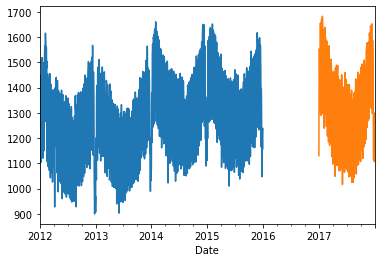

In [74]:
train.resample('D').Consumption.mean().plot()
test.resample('D').Consumption.mean().plot()

### Distribution 

<AxesSubplot:title={'center':'Consumption Distribution'}, ylabel='Frequency'>

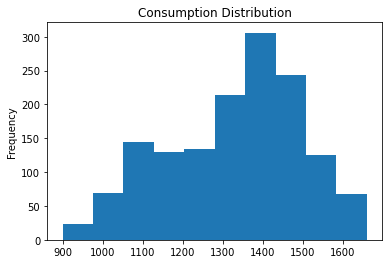

In [75]:
train.Consumption.plot.hist(title = 'Consumption Distribution')

<AxesSubplot:xlabel='year'>

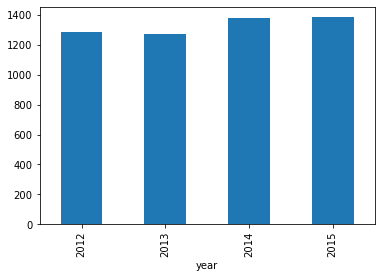

In [77]:
train.groupby('year').Consumption.mean().plot.bar()

<AxesSubplot:title={'center':'Weekly Consumption'}, xlabel='Date'>

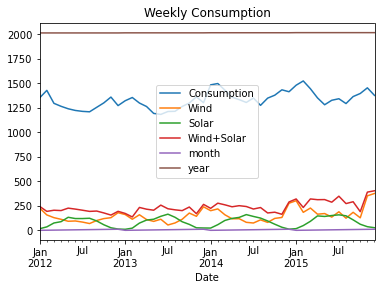

In [78]:
train.resample('M').mean().plot(title = 'Weekly Consumption')

<AxesSubplot:title={'center':'3 Month Average'}, xlabel='Date'>

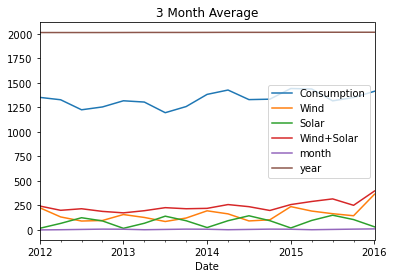

In [79]:
train.resample('3M').mean().plot(title = '3 Month Average')

<AxesSubplot:title={'center':'Average Weekly'}, xlabel='Date'>

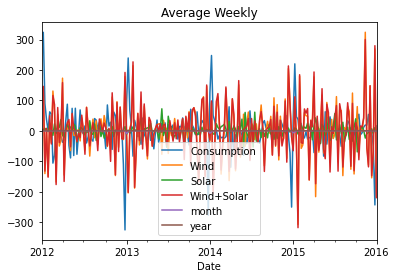

In [80]:
train.resample('W').mean().diff().plot(title='Average Weekly')

In [92]:
A = train.Consumption
B = train.Wind
C = train.Solar 
D = train['Wind+Solar']

<AxesSubplot:title={'center':'Average Weekly Consumption'}, xlabel='Date'>

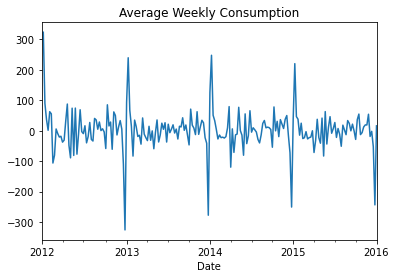

In [93]:
A.resample('W').mean().diff().plot(title='Average Weekly Consumption')

<AxesSubplot:title={'center':'Average Weekly Wind'}, xlabel='Date'>

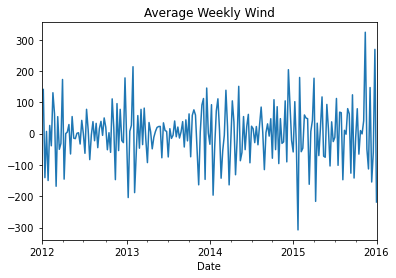

In [94]:
B.resample('W').mean().diff().plot(title='Average Weekly Wind')

<AxesSubplot:title={'center':'Average Weekly Solar'}, xlabel='Date'>

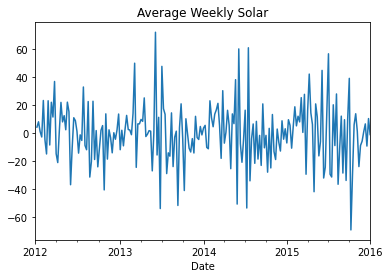

In [95]:
C.resample('W').mean().diff().plot(title='Average Weekly Solar')

<AxesSubplot:title={'center':'Average Weekly Wind plus Solar'}, xlabel='Date'>

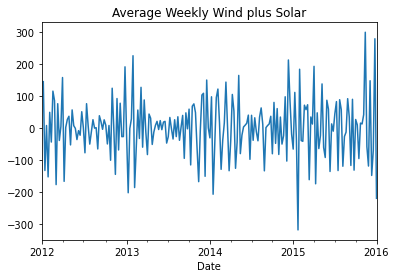

In [96]:
D.resample('W').mean().diff().plot(title='Average Weekly Wind plus Solar')

<AxesSubplot:title={'center':'Average Monthly Consumption'}, xlabel='Date'>

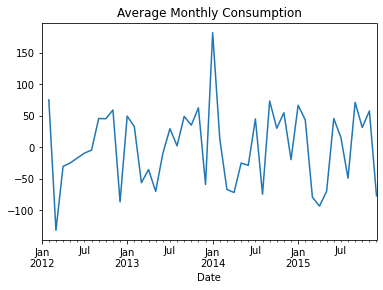

In [97]:
A.resample('M').mean().diff().plot(title='Average Monthly Consumption')

<AxesSubplot:title={'center':'Average Monthly Wind'}, xlabel='Date'>

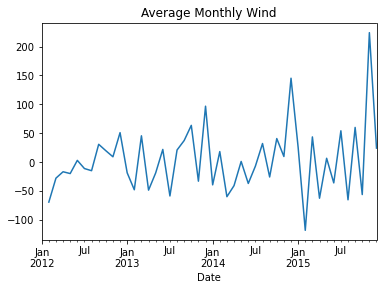

In [98]:
B.resample('M').mean().diff().plot(title='Average Monthly Wind')

<AxesSubplot:title={'center':'Average Monthly Solar'}, xlabel='Date'>

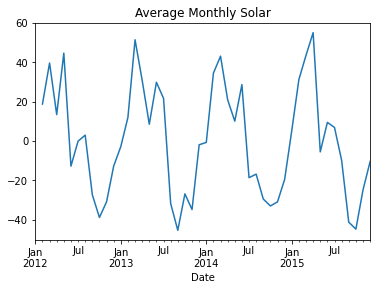

In [99]:
C.resample('M').mean().diff().plot(title='Average Monthly Solar')

<AxesSubplot:title={'center':'Average Monthly Wind and Solar'}, xlabel='Date'>

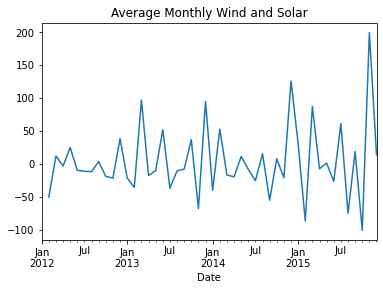

In [100]:
D.resample('M').mean().diff().plot(title='Average Monthly Wind and Solar')

Text(0, 0.5, 'Total Consumption')

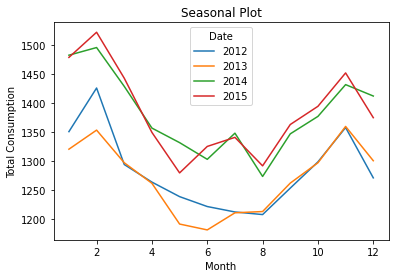

In [101]:
A.groupby([A.index.year, A.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.xlabel('Month')
plt.ylabel('Total Consumption')